<a href="https://colab.research.google.com/github/MaxGama/DataScience/blob/master/WordCloud_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como criar uma Wordcloud em Python

Neste artigo analisaremos como criar uma wordcloud usando Python com a ajuda da biblioteca ***'wordcloud'***. Wordcloud (em português, nuvem de palavras ou nuvem de tags) é um tipo de visualização de dados muito poderoso, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Em resumo, é como se você estivesse contando a frequência com que cada palavra aparece em um texto. Com essa frequência, você define tamanhos proporcionais às palavras, dispondo elas também em ângulos diferentes.

Nesse artigo usaremos a base de dados disponibilizada pelo Airbnb no seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), e peguei os dados para a cidade do Rio de Janeiro. Lá é possível baixar um grande volume de dados de diferentes cidades para desenvolver projetos e soluções de *Data Science*.

Basicamente, eu extrai as descrições de todas as casas que estão para alugar, com a finalidade de descobrir quais os termos e palavras mais usados pelos anfitriões do site. Veja como fazer o mesmo neste tutorial.

## Importando os dados do Airbnb

Novamente iremos usar dados do AirBnB, que é um grande fomentador do Data Science.


In [0]:
# instalar wordcloud caso você não tenha
!pip install wordcloud -q

In [9]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um df
df = pd.read_csv("http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0")

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# exemplos de descrições para os imóveis no Airbnb
display(summary.iloc[100])
display(summary.iloc[120])
display(summary.iloc[133])

'Ambiente tranquilo e familiar,ótimo para viajantes que no final do dia queiram descansar e ter uma noite tranquila. Excelente bairro que fica próximo a Lagoa Rodrigo de Freitas, que é um dos lindos cartões postais de nossa cidade. Aguardo você!'

'O quarto é lindo e bem grande e possui acesso para a varanda do apartamento. Possui grandes armários,  bancada. Esse é o quarto maior de um apartamento/cobertura de 150m2 que possui 3 quartos, sala, varandas em torno de todo o apartamento, cozinha ampla com dependências. Esse quarto não possui banheiro privativo. Os hospedes desse quarto compartilham o banheiro com as pessoas que estiverem utilizando o segundo quarto. O terceiro quarto é a suíte que normalmente é utilizada por mim e meu marido.'

'Aconchegante, amplo, básico, arejado, iluminado com luz natural em prédio seguro e familiar. Prédio com portaria 24 horas e cameras de segurança em todos os andares do edifício. Tudo isto em Copacabana a quase 1 quadra do mar! É o segundo prédio da segunda quadra da praia!!! Está localizado na Av. Prado Junior quase esquina com Av. N.Sra de Copacabana!'

Para conseguir criar uma nuvem de palavras eu preciso juntar todas elas em um único texto.

Para você ter ideia, temos um total de 9.823.645 extraídas da base de dados do Airbnb! Essa massa de volumes pode ser difícil de analisar por manipulação tradicional de dados, mas com a ajuda da wordcloud é possível identificar somente o que de fato importa.

In [4]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 9823645


A primeira etapa consiste em criar uma lista de **stopwords**. Stopwords são basicamente  palavras que devem ser removidas da wordcloud por não agregarem nenhuma informação (no entanto aparecem muito!). Alguns exemplos são *"a", "não", "mas", "and", "I", "not"*, entre outras.

Depois de definir as palavras que serão descartadas, instanciamos um objeto do tipo `WordCloud` e fornecemos os parâmetros como segue abaixo. Agora é só chamar o método `generate()` e a wordcloud será gerada.

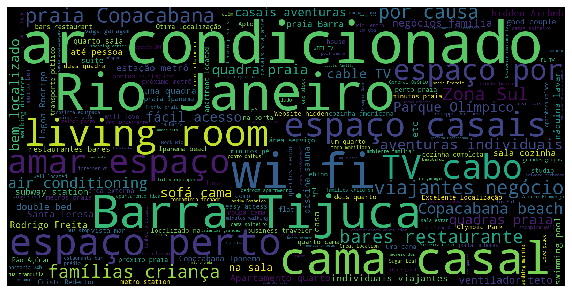

In [7]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "bom", "para", "vai"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

No calor *Senegalês* do Rio de Janeiro, é CLARO que a palavra **Ar Condicionado** tinha que vir em primeiro lugar.

# Conclusão
Extraindo dados onde temos uma grande gama de palavras é possível, com certa facilidade, criar um WordCloud, com alguns comandos em Python.